In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [7]:
X_train.shape

(60000, 28, 28)

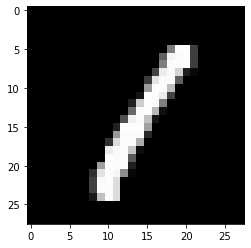

In [8]:
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
plt.show()

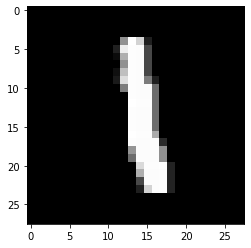

In [9]:
plt.imshow(X_train[6],cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
y_train[0]

5

In [12]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
X_train=X_train.reshape((X_train.shape[0],28,28,1))

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test=X_test.reshape((X_test.shape[0],28,28,1))

In [20]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    #dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(56,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [24]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 107s 7ms/step - loss: 0.1692 - accuracy: 0.9498
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0393 - accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0125 - accuracy: 0.9960
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - 

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0342 - accuracy: 0.9906


[0.03416222706437111, 0.9905999898910522]

In [27]:
model.save("cnnDigitsModel.h5")

In [1]:
!pip install tensorflowjs

  Using cached flax-0.6.2-py3-none-any.whl (189 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached jax-0.4.10.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.5.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.4.0-py3-none-any.whl (85 kB)
  Using cached flax-0.6.10-py3-none-any.whl (226 kB)
  Using cached tensorflowjs-4.3.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.2.0-py3-none-any.whl (84 kB)
  Usi

ERROR: Cannot install flax because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Using cached msgpack-1.0.5-cp38-cp38-win_amd64.whl (62 kB)
  Using cached optax-0.1.5-py3-none-any.whl (164 kB)
  Using cached orbax_checkpoint-0.2.3-py3-none-any.whl (81 kB)
  Using cached tensorstore-0.1.36-cp38-cp38-win_amd64.whl (8.4 MB)
  Using cached rich-13.3.5-py3-none-any.whl (238 kB)
  Using cached ml_dtypes-0.1.0-cp38-cp38-win_amd64.whl (120 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)
INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.11.1-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.1-cp38-cp38-win_amd64.whl (266.3 MB)

ERROR: Could not find a version that satisfies the requirement tensorflow_decision_forests (from versions: none)
ERROR: No matching distribution found for tensorflow_decision_forests


In [2]:
!tensorflowjs_converter --input_format keras './cnnDigitsModel.h5' './mnist-cnn_model'

Traceback (most recent call last):
  File "C:\Python38\lib\runpy.py", line 193, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Python38\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Python38\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Python38\lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Python38\lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Python38\lib\site-packages\tensorflowjs\converters\converter.py", line 37, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\Python38\lib\site-packages\tensorflowjs\converters\tf_saved_model_conversion_v2.py", line 28, in <module>
    import tensorflow_decision_forests
ModuleNotFoundError: No module named 'tensorflow_decision_forests'
